In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\my\Desktop\git\Data Analysis\netflix1.csv")

In [3]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
df.drop('show_id',inplace=True,axis=1)

In [10]:
movies=df.groupby('type').count().reset_index()[['type','title']]
movies['% contribution']=movies['title']/movies['title'].sum()
keys=movies['type'].to_list()
values=movies['% contribution'].to_list()

In [13]:
movies

,type,title,% contribution
0,Movie,6126,0.696928
1,TV Show,2664,0.303072


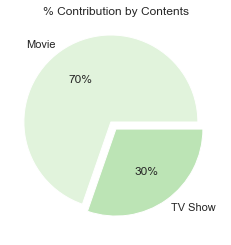

In [111]:
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('Greens')
  
# plotting data on chart
plt.title('% Contribution by Contents')
plt.pie(values, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [108]:
country=df.groupby(['country']).count().reset_index()[['country','title']]
top_country_15=country.sort_values(by='title',ascending=False).head(15)
top_country_15

,country,title
80,United States,3240
29,India,1057
79,United Kingdom,638
52,Pakistan,421
51,Not Given,287
10,Canada,271
36,Japan,259
68,South Korea,214
20,France,213
70,Spain,182


In [109]:
type=df[df.type=='Movie'].groupby('country').count().reset_index()[['country','type']]
type_country_15=type.sort_values(by='type',ascending=False).head(15)
type_country_15

,country,type
73,United States,2395
27,India,976
72,United Kingdom,387
47,Not Given,257
9,Canada,187
18,France,148
64,Spain,129
16,Egypt,109
45,Nigeria,96
40,Mexico,90


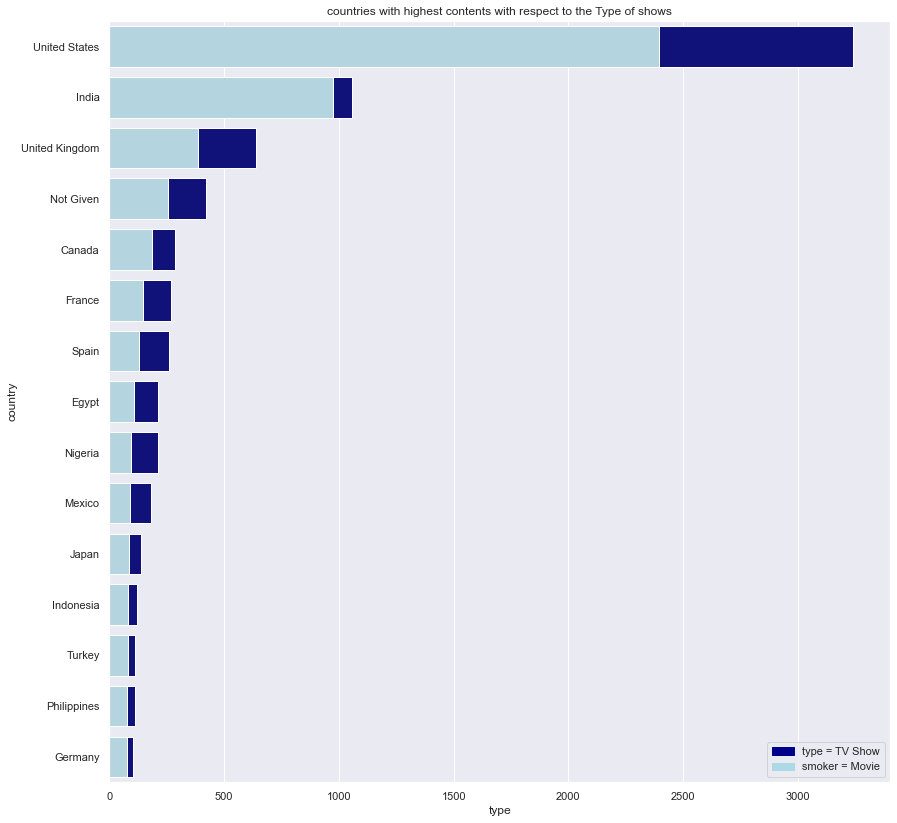

In [110]:
import matplotlib.patches as mpatches
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))
bar1 = sns.barplot(x="title",  y="country", data=top_country_15, color='darkblue').set(title='countries with highest contents with respect to the Type of shows')
bar2 = sns.barplot(x="type", y="country", data=type_country_15, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='type = TV Show')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Movie')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [60]:
directors=df.groupby(['director']).count().reset_index()[['director','type']]
directors=directors[directors['director']!='Not Given']
directors=directors.sort_values(by='type',ascending=False).head(10)
directors

,director,type
3392,Rajiv Chilaka,20
126,Alastair Fothergill,18
3443,"Raúl Campos, Jan Suter",18
2597,Marcus Raboy,16
4046,Suhas Kadav,16
1789,Jay Karas,14
684,Cathy Garcia-Molina,13
2670,Martin Scorsese,12
4480,Youssef Chahine,12
1786,Jay Chapman,12


In [61]:
type=df[df.type=='Movie'].groupby('director').count().reset_index()[['director','type']]
type=type[type['director']!='Not Given']
top_director=type.sort_values(by='type',ascending=False).head(15)
top_director

,director,type
3253,Rajiv Chilaka,19
3304,"Raúl Campos, Jan Suter",18
3886,Suhas Kadav,16
2492,Marcus Raboy,15
1716,Jay Karas,14
661,Cathy Garcia-Molina,13
2562,Martin Scorsese,12
1713,Jay Chapman,12
4307,Youssef Chahine,12
3863,Steven Spielberg,11


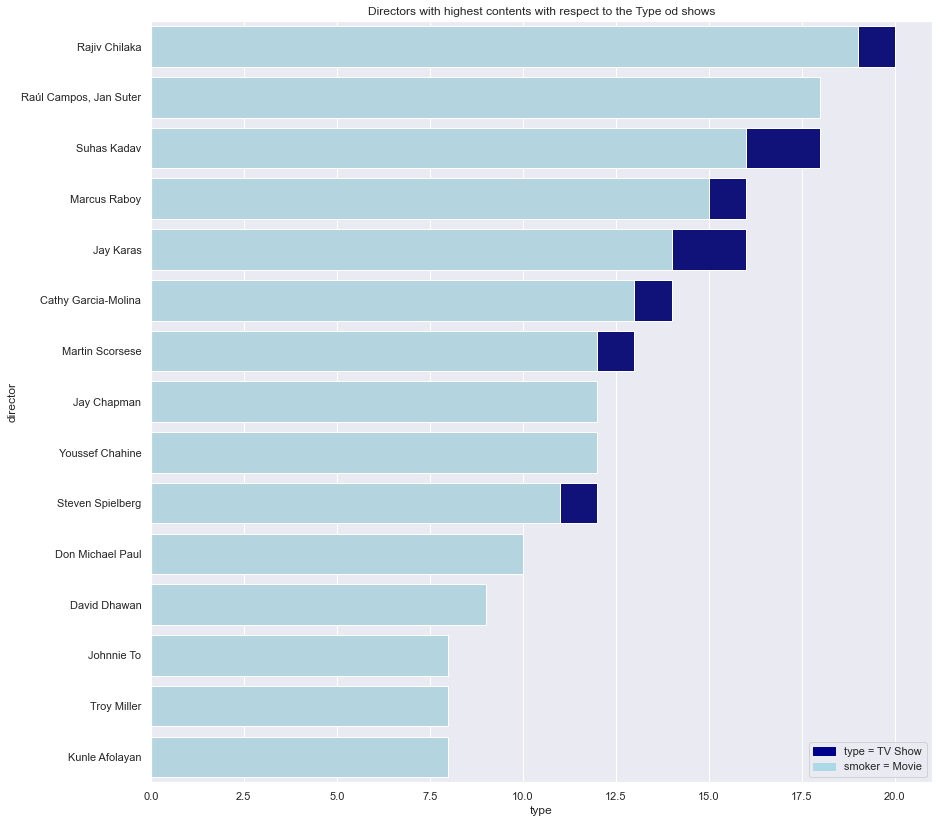

In [104]:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))
bar1 = sns.barplot(x="type",  y="director", data=directors, color='darkblue').set(title='Directors with highest contents with respect to the Type of shows')
bar2 = sns.barplot(x="type", y="director", data=top_director, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='type = TV Show')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Movie')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [68]:
df.head(5)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [81]:
year=df.groupby(['release_year','type']).count().reset_index()[['release_year','type','title']]
year_tv=year[year['type']=='TV Show'].sort_values(by='release_year',ascending=False).head(15)
year_M=year[year['type']!='TV Show'].sort_values(by='release_year',ascending=False).head(15)

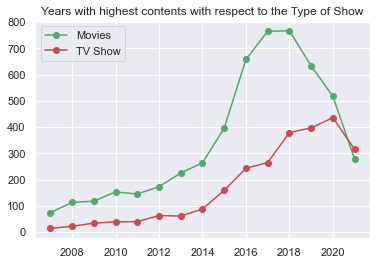

In [99]:
plt.title('Years with highest contents with respect to the Type of Show')
plt.plot(year_M['release_year'].to_list(), year_M['title'].to_list(), 'g', label='Movies',marker='o')
plt.plot(year_tv['release_year'].to_list(), year_tv['title'].to_list(), 'r', label='TV Show',marker='o')
plt.legend()
plt.show()

In [92]:
year=year.groupby('release_year').sum().reset_index()[['release_year','title']]
year=year.sort_values(by='release_year',ascending=False).head(10)

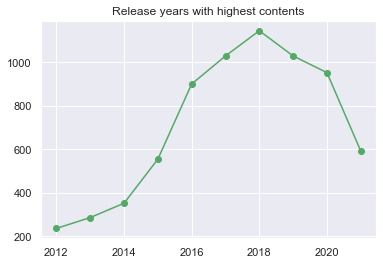

In [98]:
plt.title('Release years with highest contents')
plt.plot(year['release_year'].to_list(), year['title'].to_list(), 'g', label='total',marker='o')

In [114]:
rating=df.groupby('rating').count().reset_index()[['rating','type']]
rating=rating.sort_values(by='type',ascending=False)
rating

,rating,type
8,TV-MA,3205
6,TV-14,2157
9,TV-PG,861
5,R,799
4,PG-13,490
11,TV-Y7,333
10,TV-Y,306
3,PG,287
7,TV-G,220
2,NR,79


Text(0.5, 1.0, 'Top Ratings')

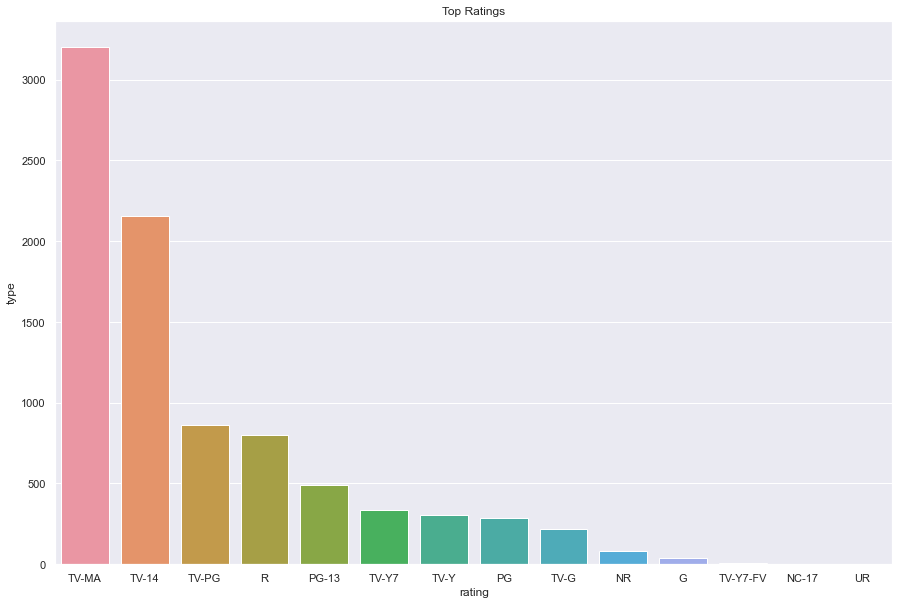

In [134]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,10
sns.barplot(data=rating,x='rating',y='type').set_title('Top Ratings')

In [138]:
show_type=df.groupby('listed_in').count().reset_index()[['listed_in','type']]
show_type=show_type.sort_values(by='type',ascending=False).head(15)
show_type

,listed_in,type
325,"Dramas, International Movies",362
273,Documentaries,359
469,Stand-Up Comedy,334
199,"Comedies, Dramas, International Movies",274
318,"Dramas, Independent Movies, International Movies",252
421,Kids' TV,219
120,Children & Family Movies,215
124,"Children & Family Movies, Comedies",201
280,"Documentaries, International Movies",186
328,"Dramas, International Movies, Romantic Movies",180


Text(0.5, 1.0, 'Type of Shows with highest more number contents')

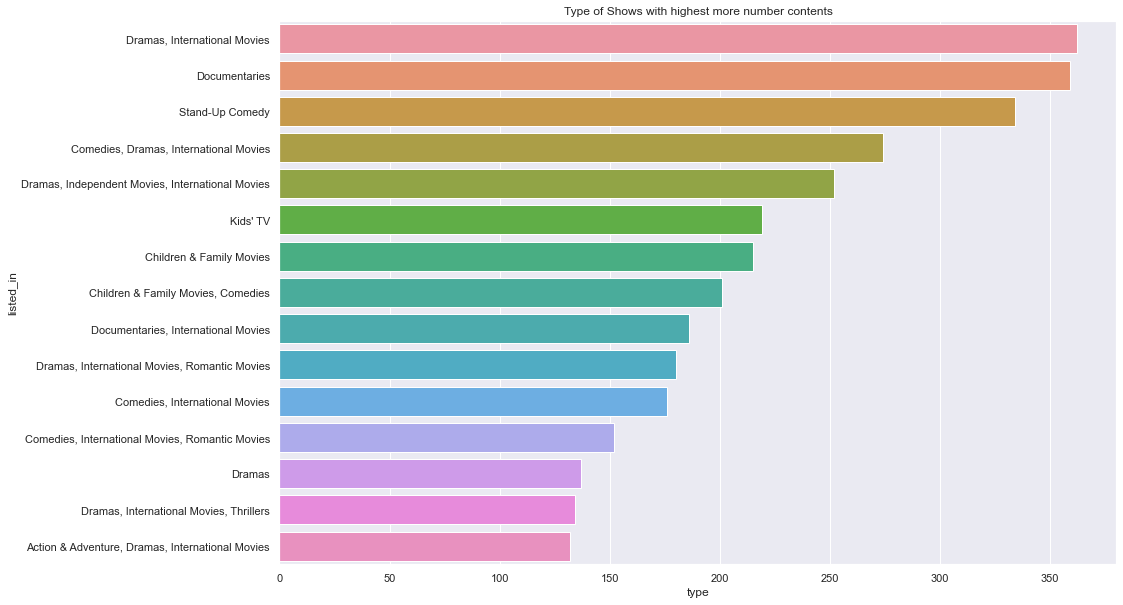

In [142]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,10
sns.barplot(data=show_type,x='type',y='listed_in').set_title('Type of Shows with highest more number contents')